In [2]:
pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 9.8 MB/s eta 0:00:00


In [3]:
import random
import pickle
import contractions
import string
import numpy as np
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [4]:
def clean_up_sentence(sentence):
  sentence = contractions.fix(sentence.lower())  
  sentence_words = nltk.word_tokenize(sentence.translate(str.maketrans("", "", string.punctuation)))
  sentence_words = [lemmatizer.lemmatize(word) for word in sentence_words]
  return sentence_words

In [5]:
def one_hot_encryption(sentence):
  sentence_words = clean_up_sentence(sentence)
  mapping_sentence = []
  for w in sentence_words:
    if(w in vocabulary):
      mapping_sentence.append(vocabulary.index(w))
    else:
      mapping_sentence.append(0)
  padded_sentence = mapping_sentence.copy()
  while(len(padded_sentence)<MAXLEN):
    padded_sentence.append(0)
  return np.array(padded_sentence)

In [6]:
def predict_class(sentence):
  ERROR_THRESHOLD = 0.5
  res = model.predict(np.array([one_hot_encryption(sentence)]))[0]
  results = [[i, r] for i, r in enumerate(res) if r > ERROR_THRESHOLD]
  results.sort(key=lambda x: x[1], reverse=True)
  return_list = []
  # print(results) -----> [[answer_id, possibility], ...]
  for r in results:
      return_list.append({"intent": r[0], "question": questions[int(r[0])], "probability": str(r[1])})
  #print('predict_class:\t', results)
  return return_list

In [7]:
def get_response(intents_list, id, ans):
  print(intents_list)
  print('\n')
  if(intents_list == []):
      result = 'Please provide additional information.'
  else:
    tag = intents_list[0]['intent'] #! tag = intents_list[0]['intent']
    #list_of_intents = intents_json['intents']
    result = ans[id.index(tag)]
    print(questions[id.index(tag)])
  return result

In [8]:
def chatbot_response(msg):
    ints = predict_class(msg)
    res = get_response(ints, id, answers)
    return res

In [9]:
lemmatizer = WordNetLemmatizer()
questions = []
answers = []
id = []
MAXLEN = pickle.load(open('/content/drive/MyDrive/_PTYXIAKI/RUN_3/MAXLEN_3.pkl', 'rb'))

vocabulary = pickle.load(open('/content/drive/MyDrive/_PTYXIAKI/RUN_3/vocabulary_3.pkl', 'rb'))
#classes = pickle.load(open('classes.pkl', 'rb'))

model = load_model('/content/drive/MyDrive/_PTYXIAKI/RUN_3/chatbot_model_3.h5')

In [10]:
with open('/content/drive/MyDrive/_PTYXIAKI/RUN_3/training_data_3.txt', 'r') as file:
  print('Dataset in use:\t', file.name)
  for i, line in enumerate(file):
    if(i%3==1):
      questions.append(line)
    elif(i%3==2):
      answers.append(line)
    elif(i%3==0):
      id.append(int(line))

Dataset in use:	 /content/drive/MyDrive/_PTYXIAKI/RUN_3/training_data_3.txt


In [11]:
def get_response2(intents_list, id, ans):
  #print(intents_list)
  #print('\n')
  if(intents_list == []):
      result = 'Please provide additional information.'
      r1 = 'null'
      r2 = 0
  else:
    tag = intents_list[0]['intent'] #! tag = intents_list[0]['intent']
    #list_of_intents = intents_json['intents']
    result = ans[id.index(tag)]
    r1 = tag
    r2 = intents_list[0]['probability']
  return result, r1, r2

In [12]:
def chatbot_response2(msg):
    ints = predict_class(msg)
    res, r1, r2 = get_response2(ints, id, answers)
    return [res, r1, r2]

In [ ]:
# Main
while(1):
    print(chatbot_response(input('\n')))

Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
1/1 [==============================] - 1s 782ms/step


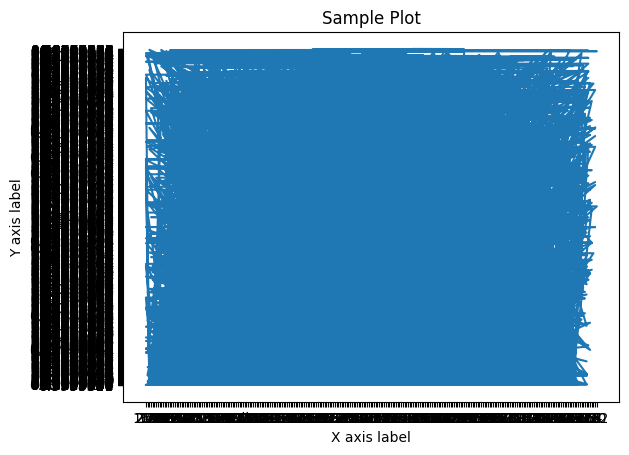

In [14]:
# Main
import matplotlib.pyplot as plt
x = []
y = []
with open('/content/drive/MyDrive/_PTYXIAKI/RUN_3/training_data_3.txt', 'r') as f:
  for i, line in enumerate(f):
    if(i%3==1):
      dc = chatbot_response2(line)
      #print(dc[0])
      x.append(dc[1])
      y.append(dc[2])

# Plot the data
plt.plot(x, y)

# Add title and axis labels
plt.title("Sample Plot")
plt.xlabel("X axis label")
plt.ylabel("Y axis label")

# Show the plot
plt.show()


In [43]:
x1 = []
y1 = []
for a,b in zip(x,y):
  if(a=='null'):
    a = 268
  x1.append(a)
  y1.append(float(b))

In [52]:
sorted_combined = sorted(list(zip(x1, y1)), key=lambda k: k[0])

In [93]:
xs = []
ys = []
for j in range(268):
  tmp = []
  for k in sorted_combined:
    if(k[0]==j):
      tmp.append(k[1])
  xs.append(tmp.copy())
  ys.append([i for i in range(len(xs[j]))].copy())

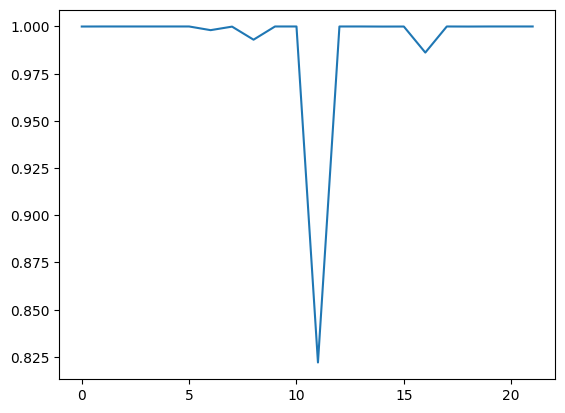

In [98]:
plt.plot(ys[6],xs[6])

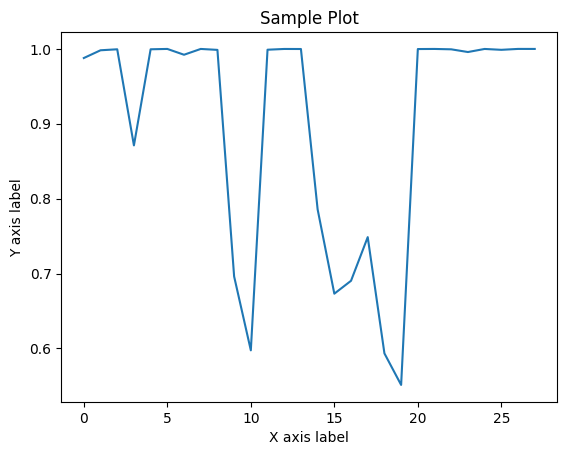

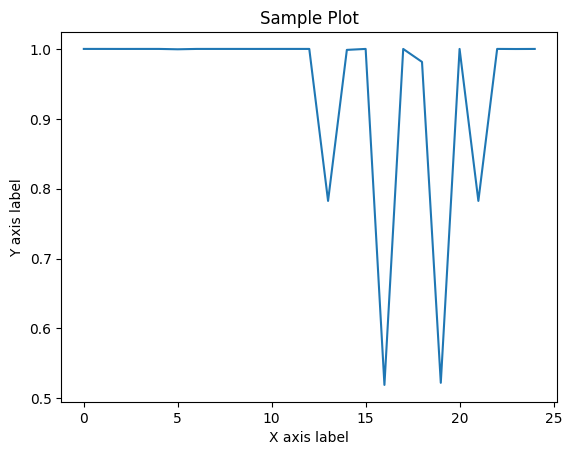

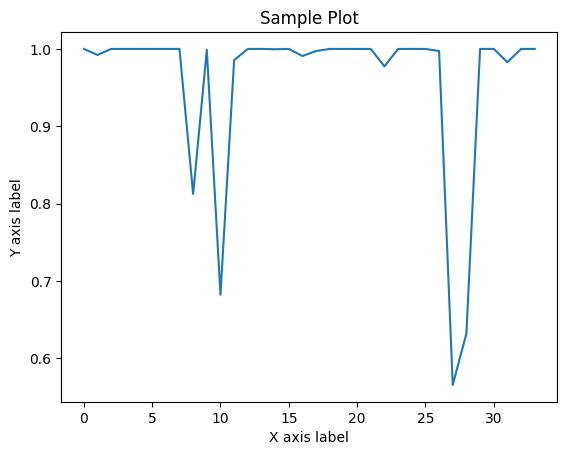

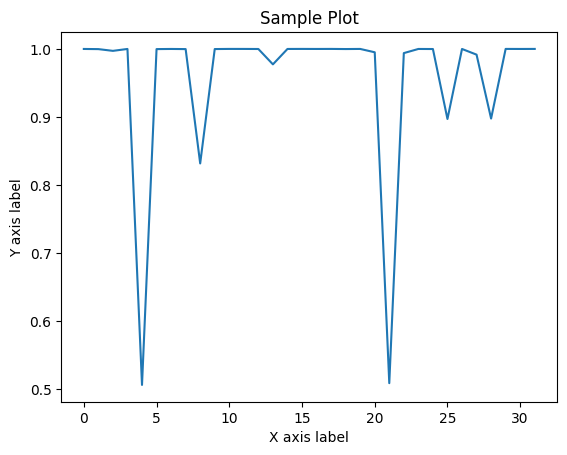

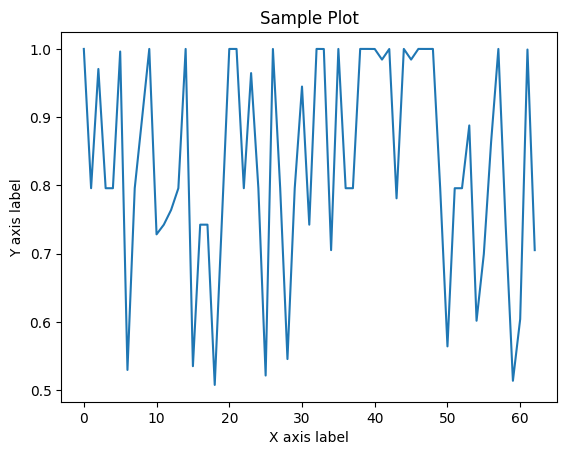

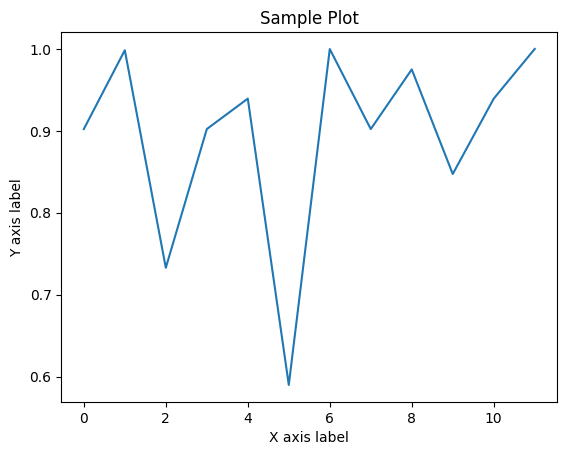

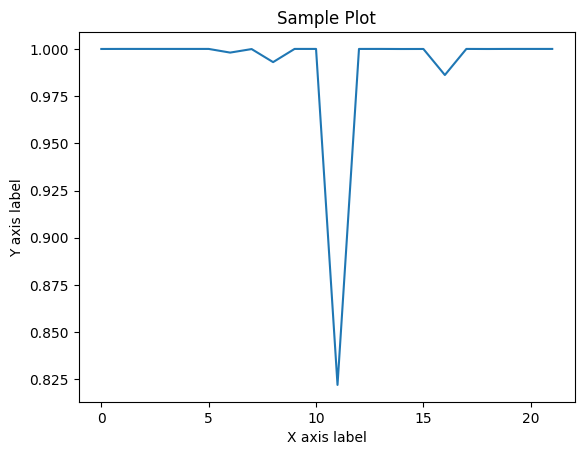

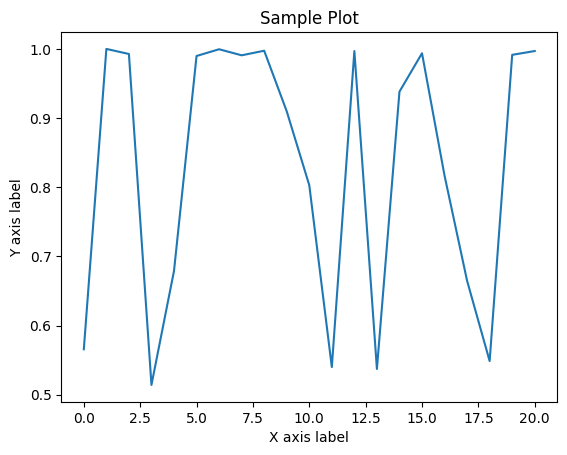

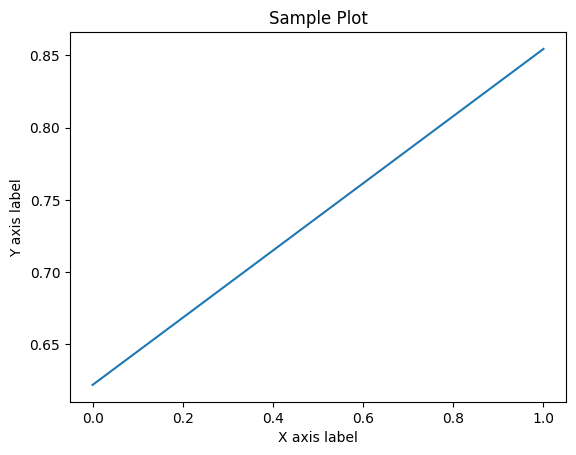

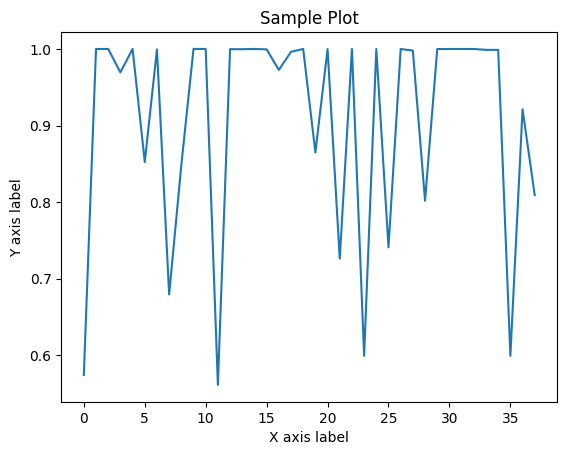

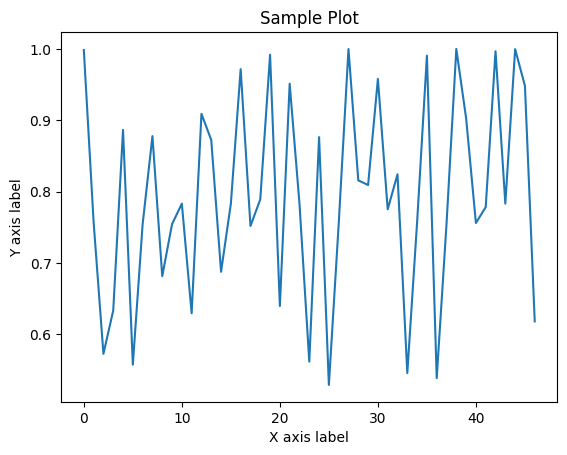

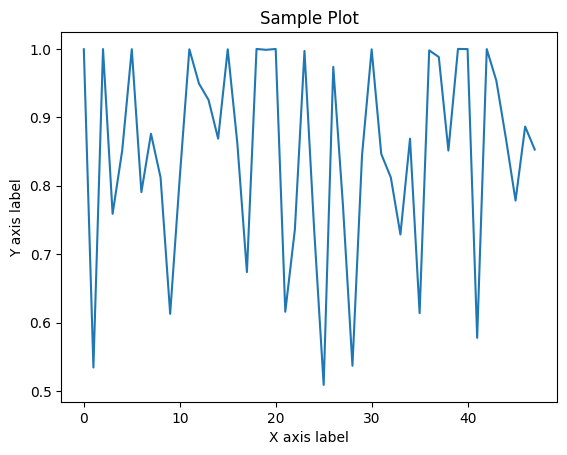

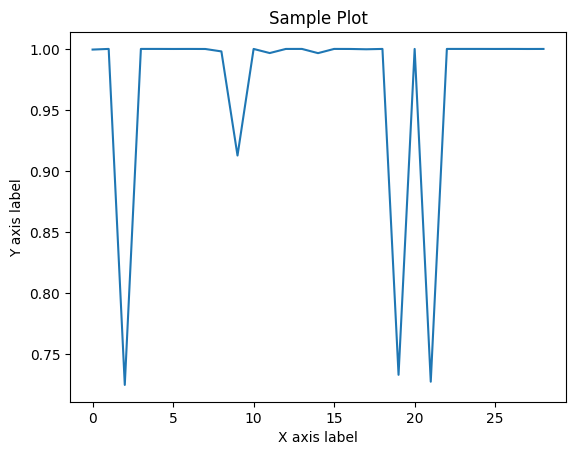

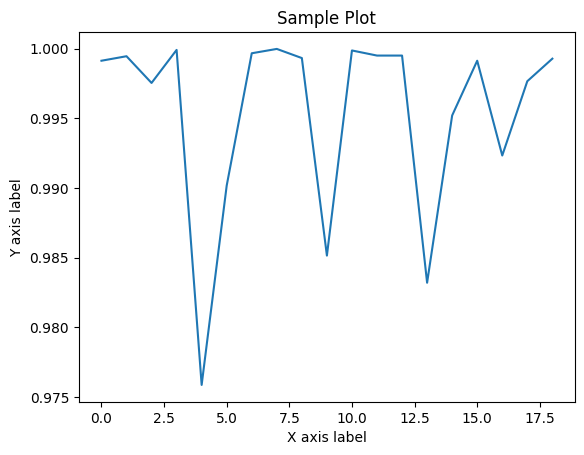

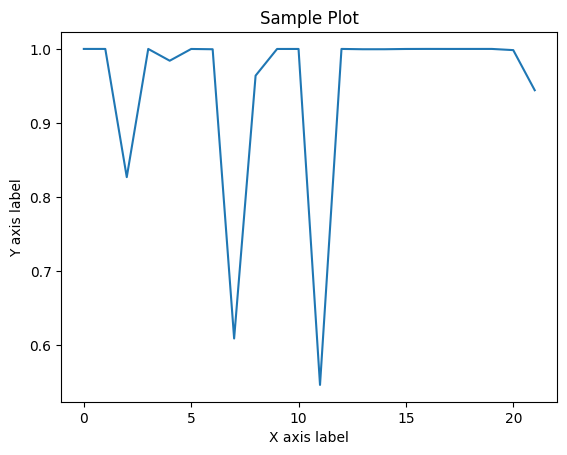

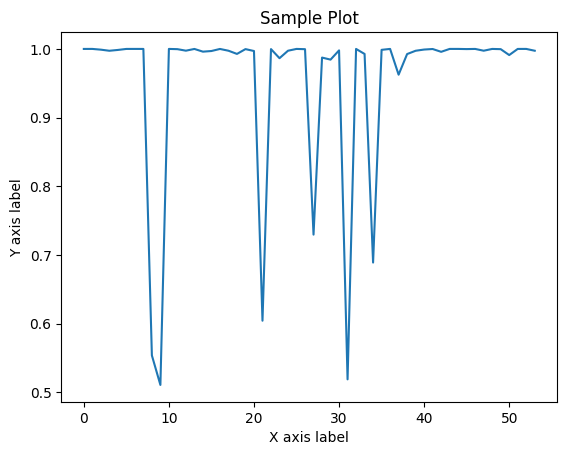

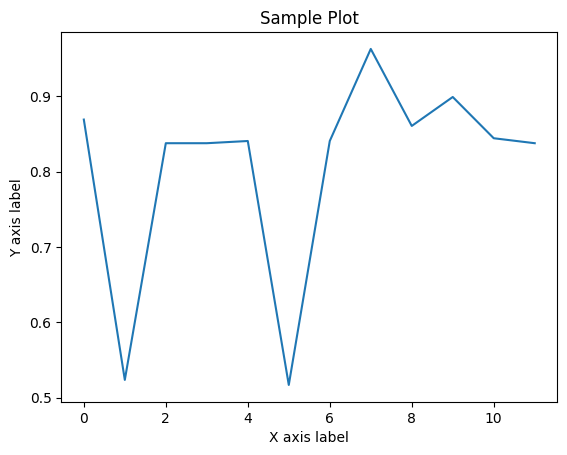

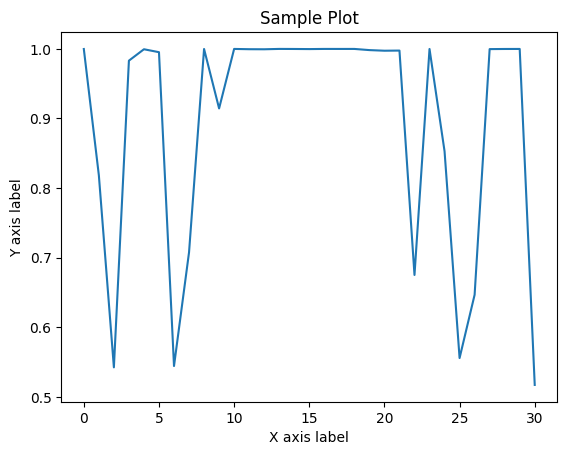

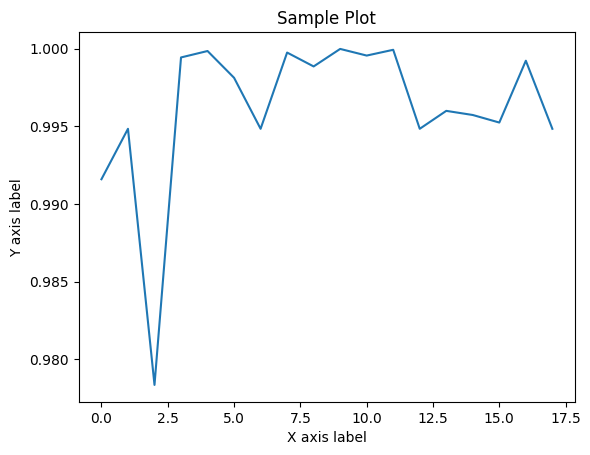

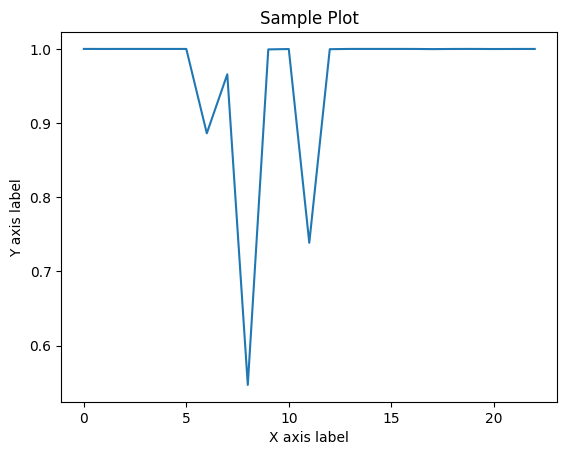

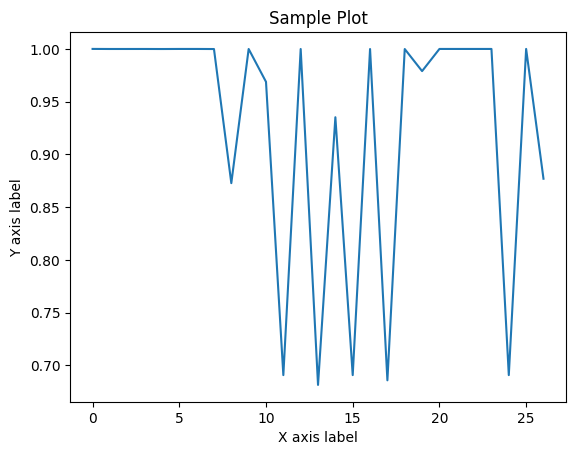

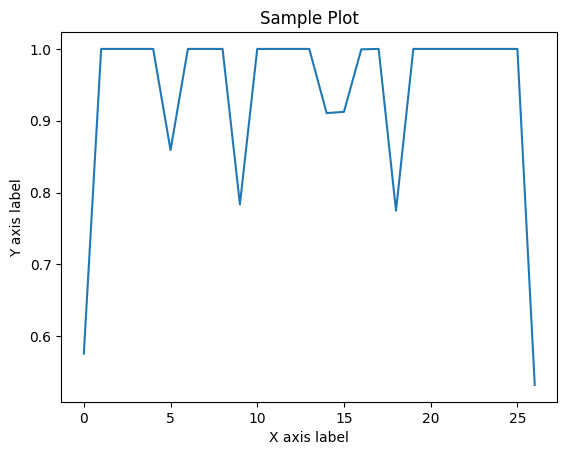

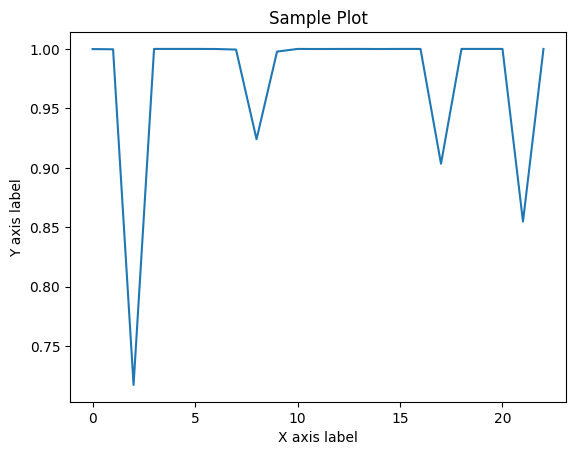

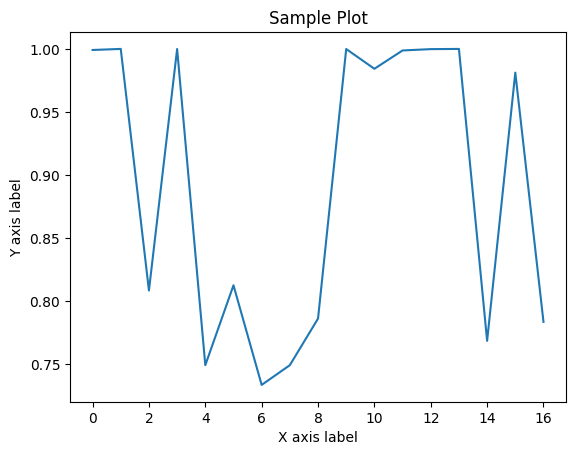

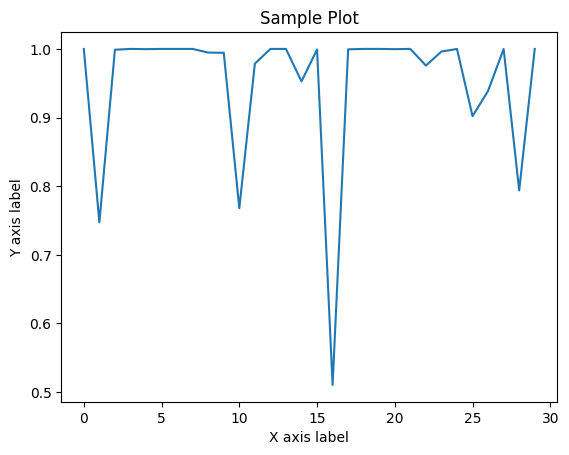

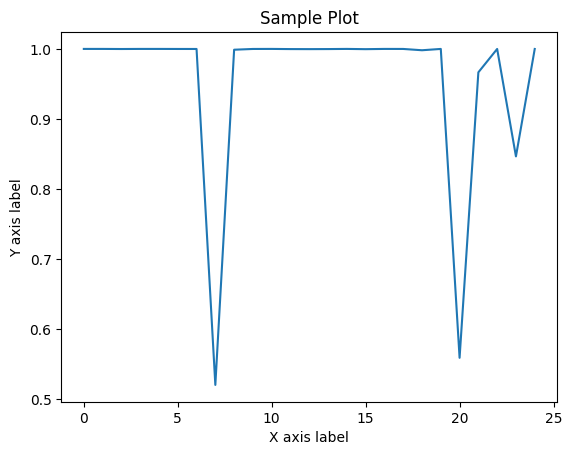

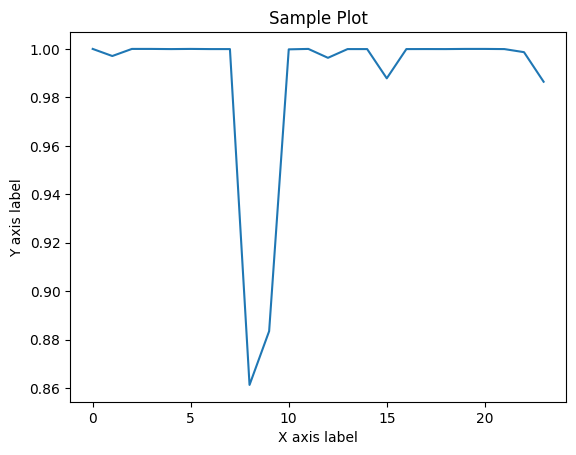

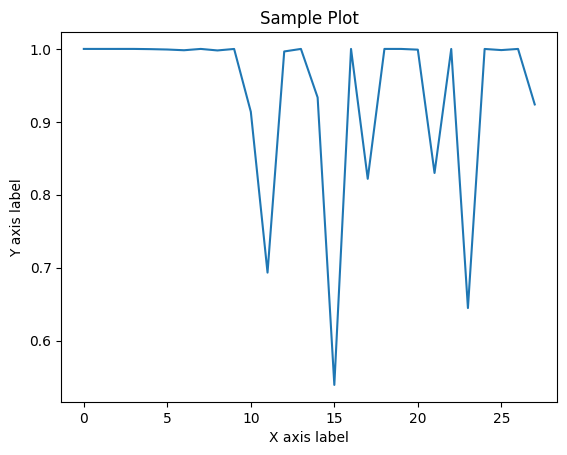

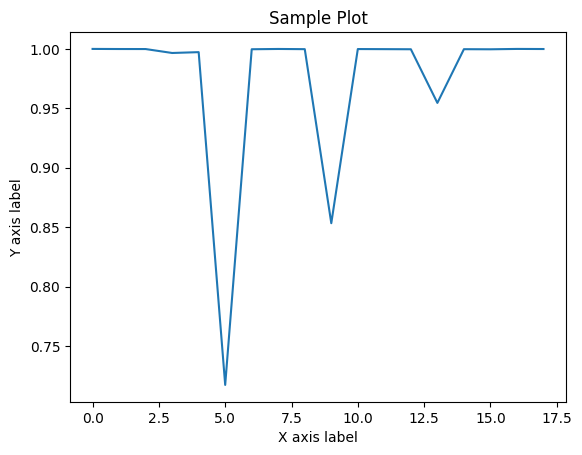

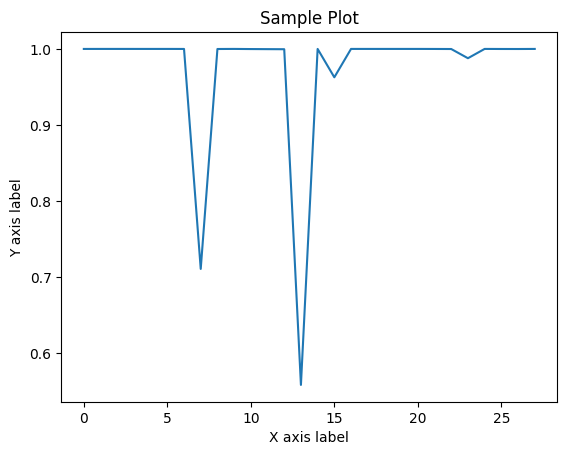

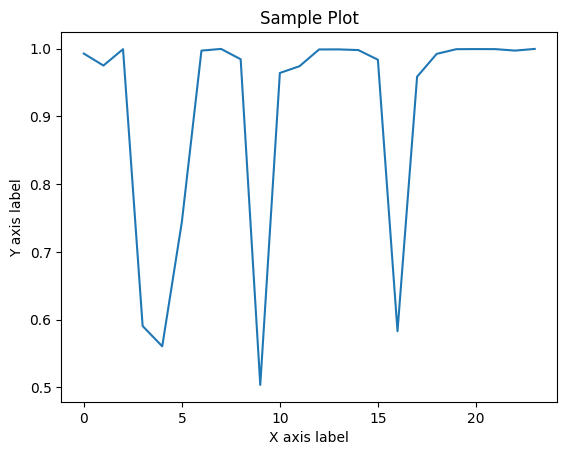

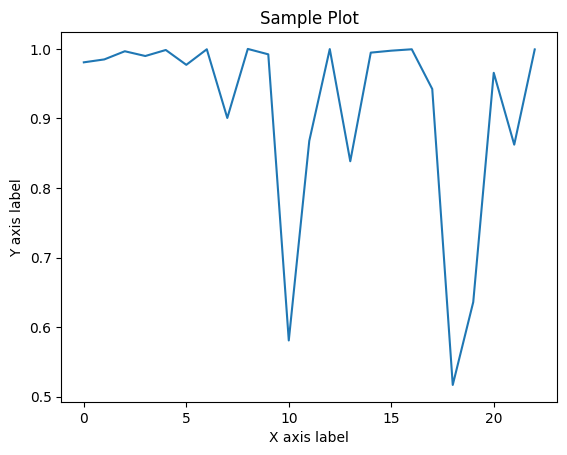

In [ ]:
for i,j in zip(xs,ys):  
  # Plot the data
  plt.plot(j,i)

  
  # Add title and axis labels
  plt.title("Sample Plot")
  plt.xlabel("X axis label")
  plt.ylabel("Y axis label")

  # Show the plot
  plt.show()

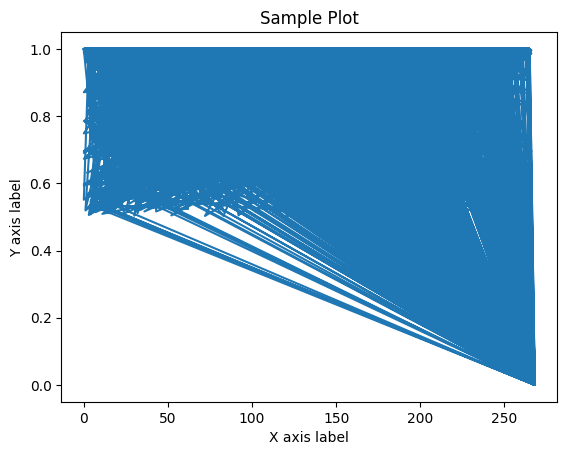

In [48]:
# Plot the data
plt.plot(x1,y1)

# Add title and axis labels
plt.title("Sample Plot")
plt.xlabel("X axis label")
plt.ylabel("Y axis label")

# Show the plot
plt.show()

In [ ]:
# @title Augmented Automated Thai-FAQ Chatbot using RNN-LSTM - Chatbot 



print('What is the emergency?')

'''
while True:
    message = input("")
    ints = predict_class(message)
    res = get_response(ints, intents)
    print(res)
'''
#so far so great




